In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/christophbleyer/Technician-Vehicle-Routing-Optimization')
from alns.Problem import Problem
from alns.TVRPAlgorithms import *
from alns.ALNS import ALNS
from alns.criteria import HillClimbing, SimulatedAnnealing, RecordToRecordTravel

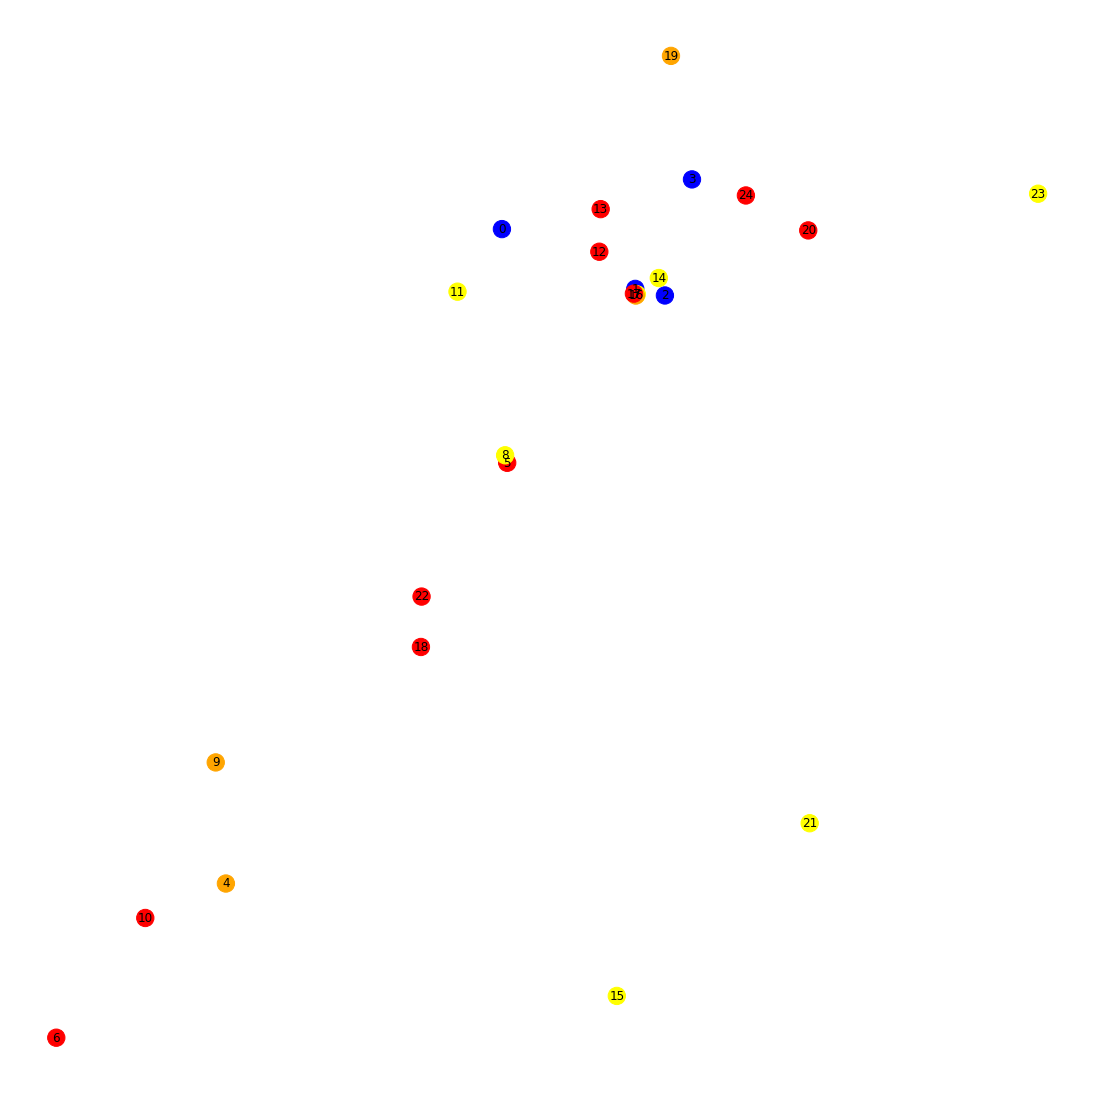

In [2]:
p = Problem("/Users/christophbleyer/Technician-Vehicle-Routing-Optimization/examples/Datasets/")
plt.rcParams["figure.figsize"]=15,15
Graph = p.plot()

# Urgency Assignment via asymetric normalized tansini affinity

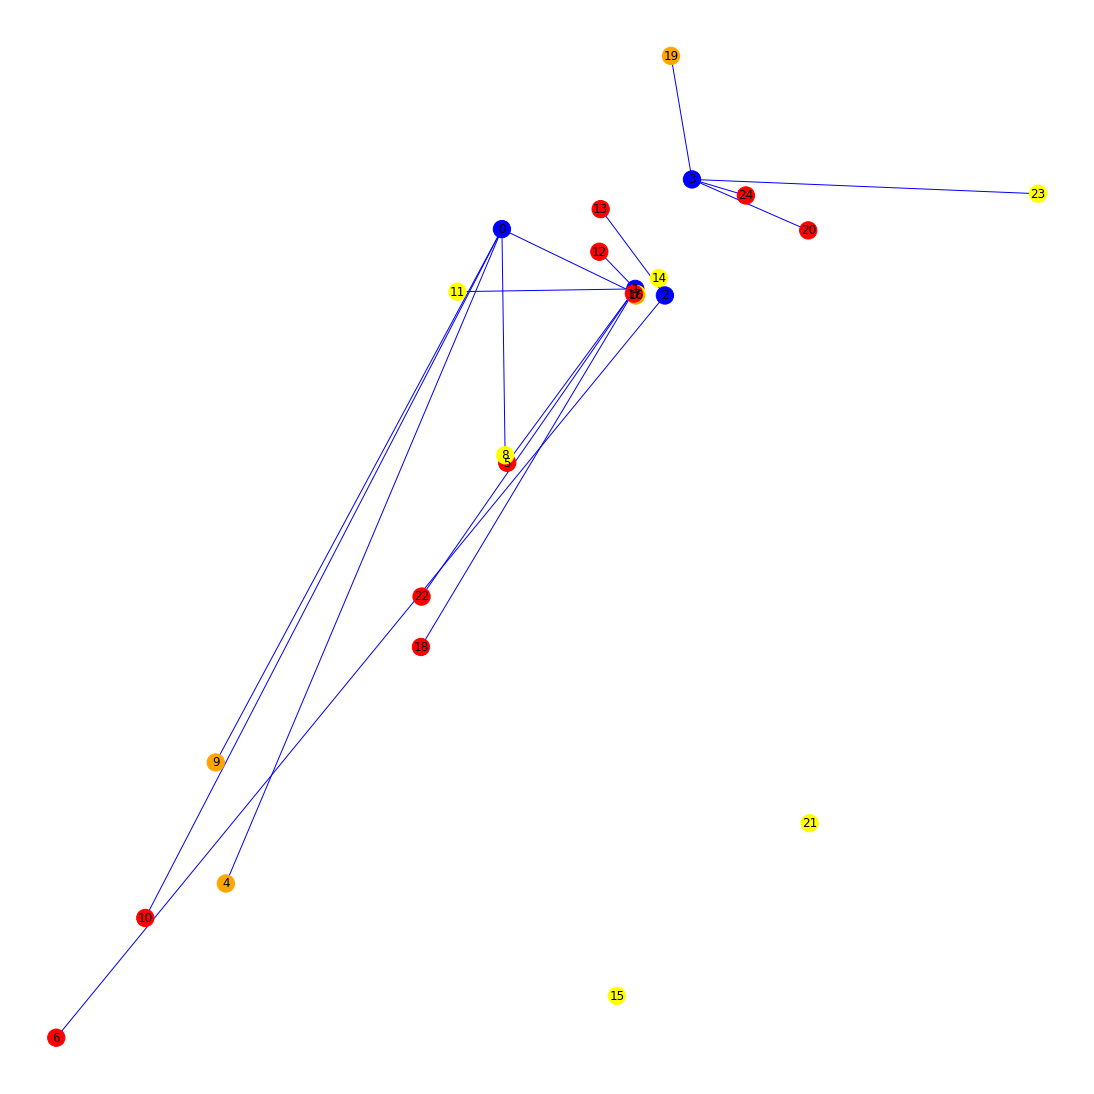

In [3]:
Graph, solution = parallelUrgencyAssignment(p, True)

In [4]:
print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(solution.problem.demand))

Percent custs in holding after clustering 0.14285714285714285


# Parallel Generalized Regret Insertion

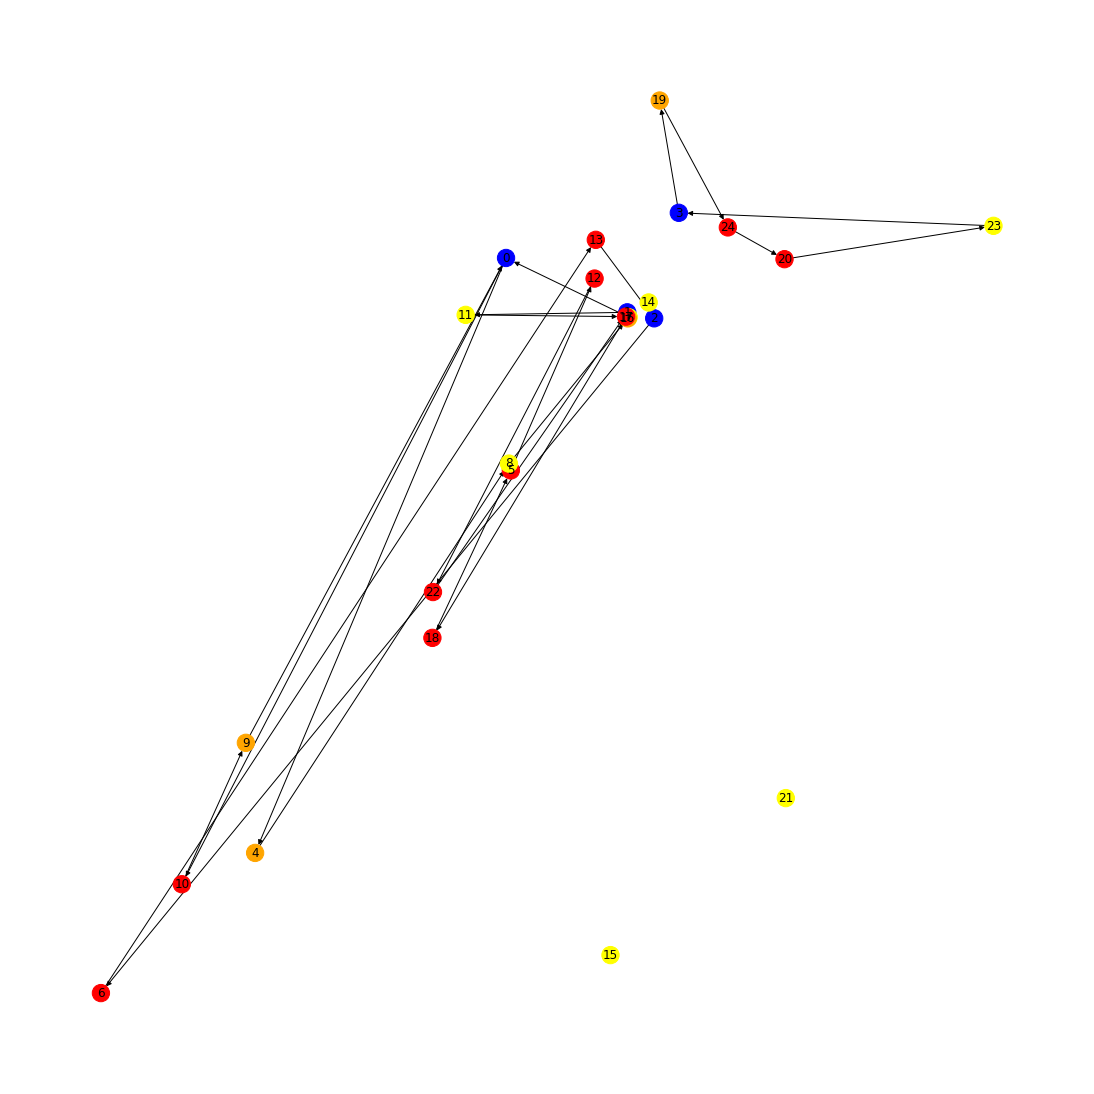

In [5]:
buildSolutionParallelStyle(solution)
Graph = solution.toGraph()

In [6]:
print("Total objective: ", solution.objective())

print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(p.demand))

Total objective:  2242.3395
Percent custs in holding after clustering 0.19047619047619047


# ALNS via Hill Climbing Acceptance

In [ ]:
alns = ALNS()
alns.add_destroy_operator(randomRemoval)
alns.add_destroy_operator(distancedBasedWorstRemoval)
alns.add_destroy_operator(timeBasedWorstRemoval)
alns.add_destroy_operator(relatedRemoval)
alns.add_repair_operator(greedyInsertion)
alns.add_repair_operator(k_regretInsertion)
criterion = HillClimbing()

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=2500, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()


In [16]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  25.255709999999997
Percent custs in holding after alns 0.0


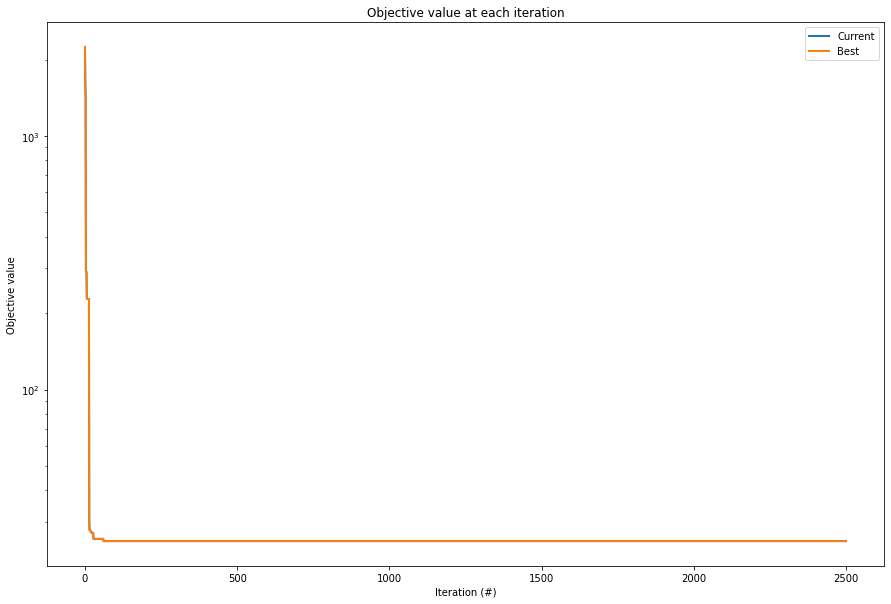

In [17]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

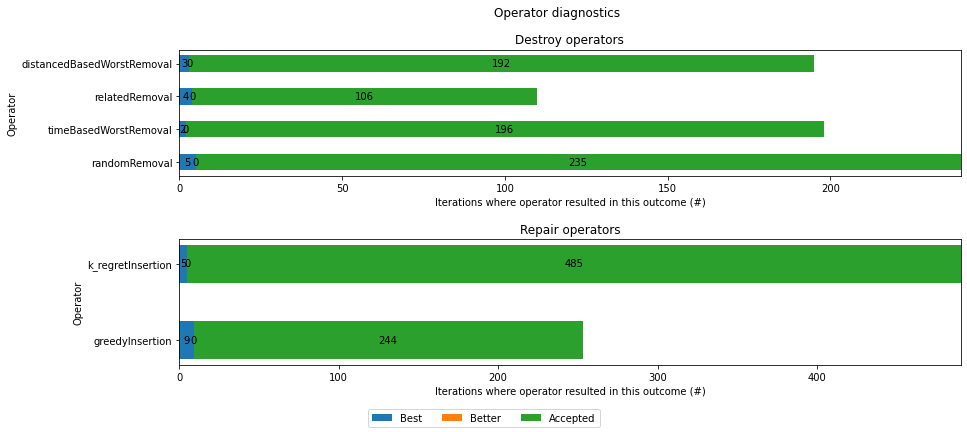

In [18]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Simulated Annealing Acceptance

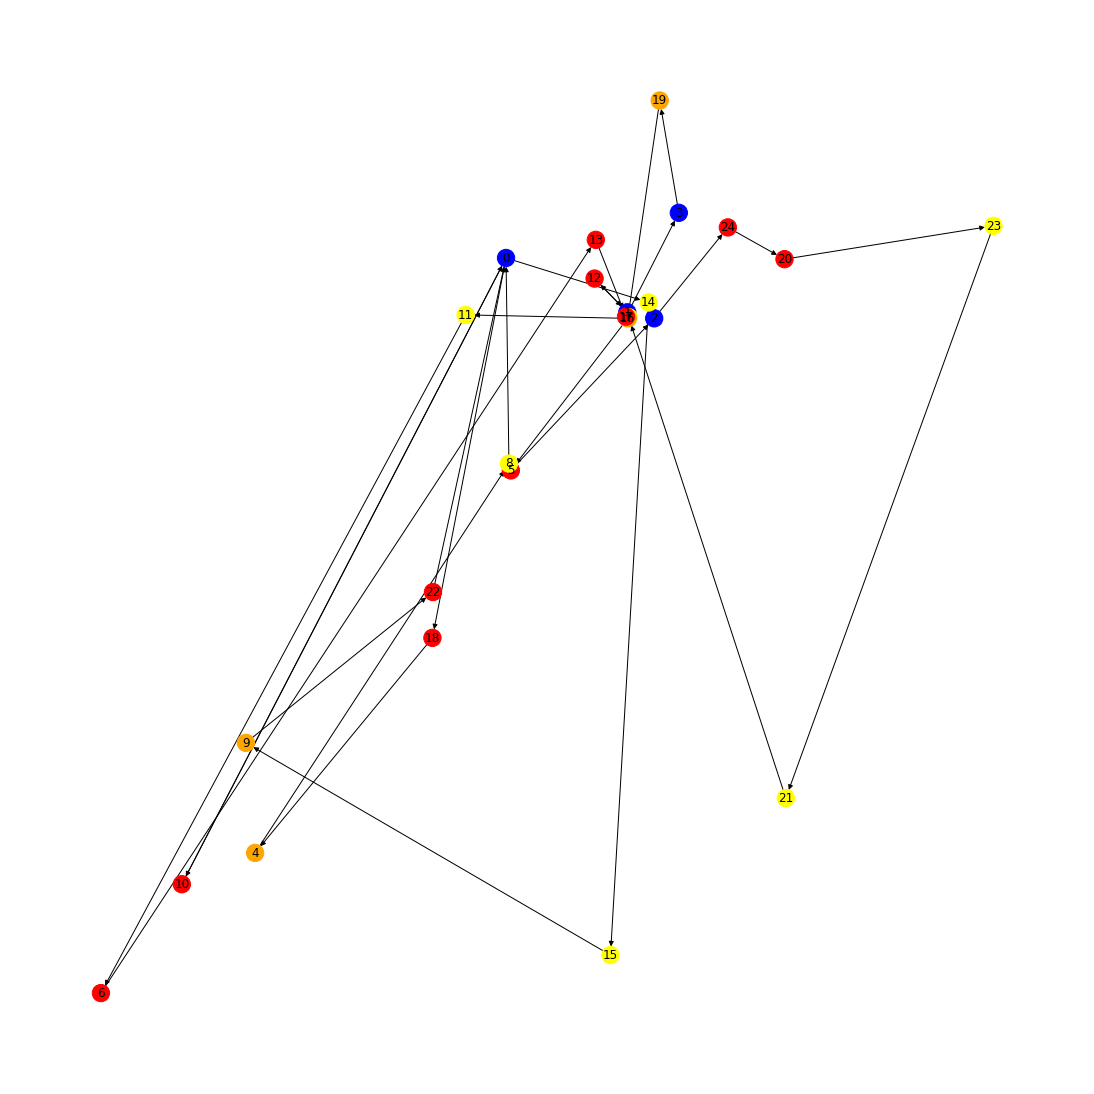

In [35]:
alns = ALNS()
alns.add_destroy_operator(randomRemoval)
alns.add_destroy_operator(distancedBasedWorstRemoval)
alns.add_destroy_operator(timeBasedWorstRemoval)
alns.add_destroy_operator(relatedRemoval)
alns.add_repair_operator(greedyInsertion)
alns.add_repair_operator(k_regretInsertion)
criterion = SimulatedAnnealing(10000, 10, 10, method = "linear")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=2500, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [36]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  23.89621
Percent custs in holding after alns 0.0


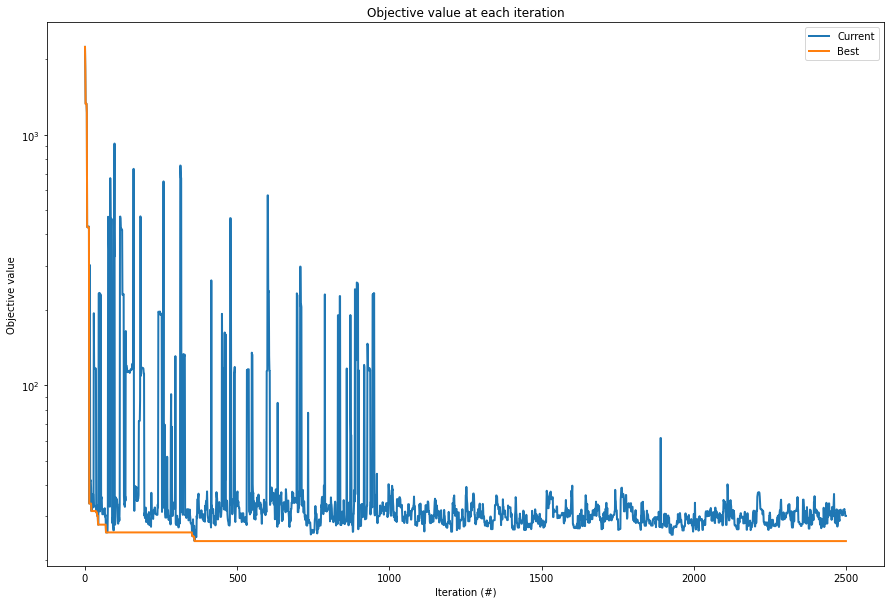

In [37]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

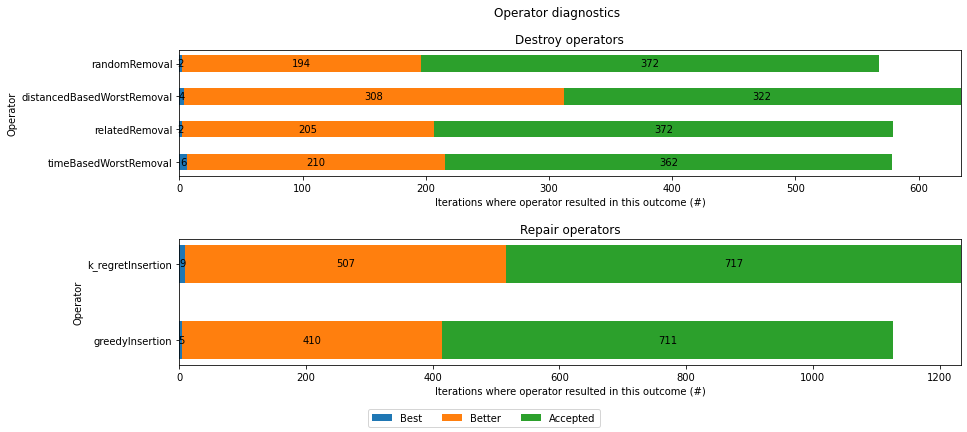

In [38]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Record to Record Travel Acceptance

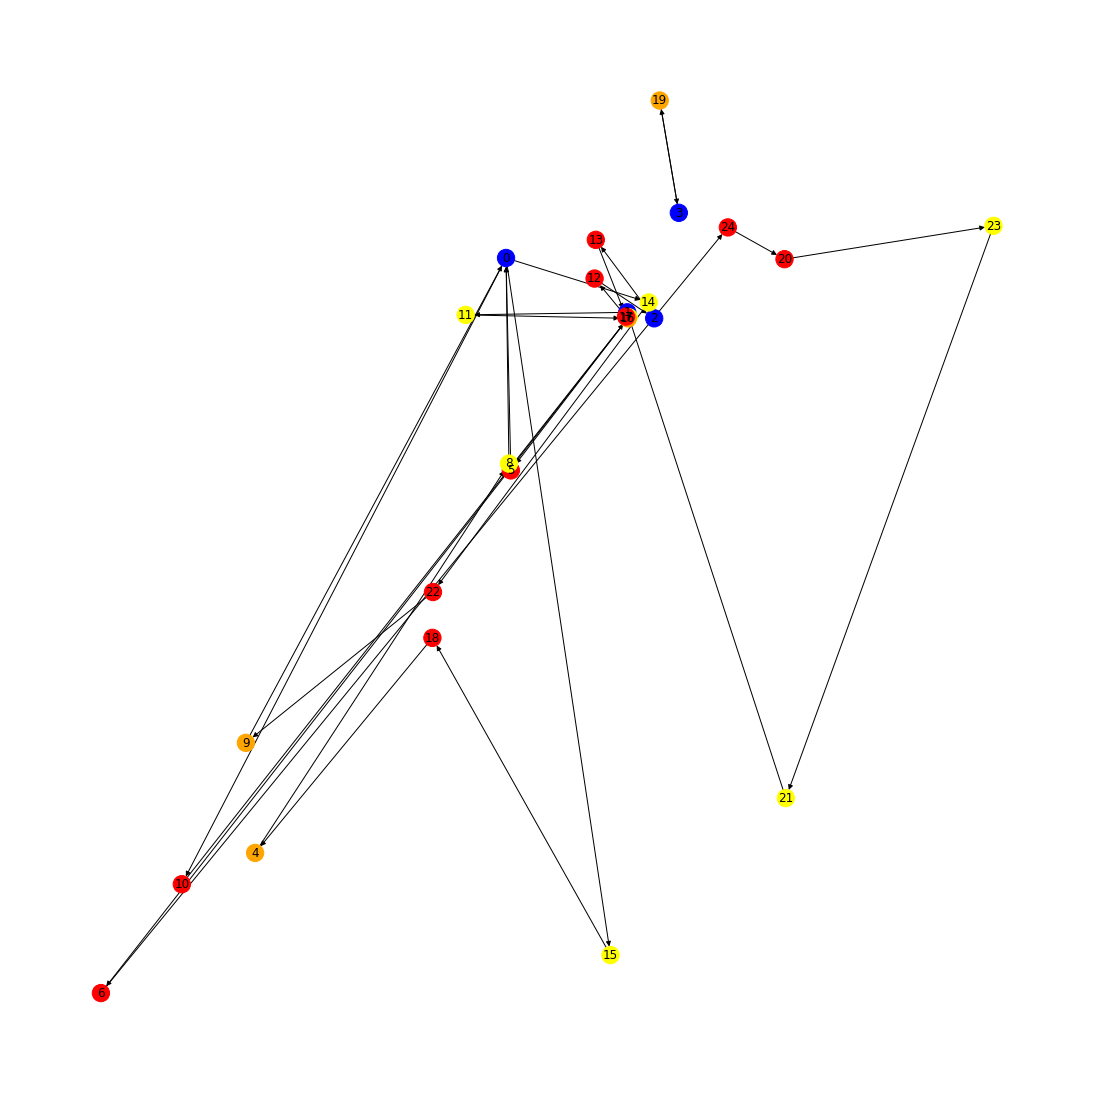

In [26]:
alns = ALNS()
alns.add_destroy_operator(randomRemoval)
alns.add_destroy_operator(distancedBasedWorstRemoval)
alns.add_destroy_operator(timeBasedWorstRemoval)
alns.add_destroy_operator(relatedRemoval)
alns.add_repair_operator(greedyInsertion)
alns.add_repair_operator(k_regretInsertion)
criterion = RecordToRecordTravel(0.95, 0.01, 0.000376, method = "linear")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=2500, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [27]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  25.372310000000002
Percent custs in holding after alns 0.0


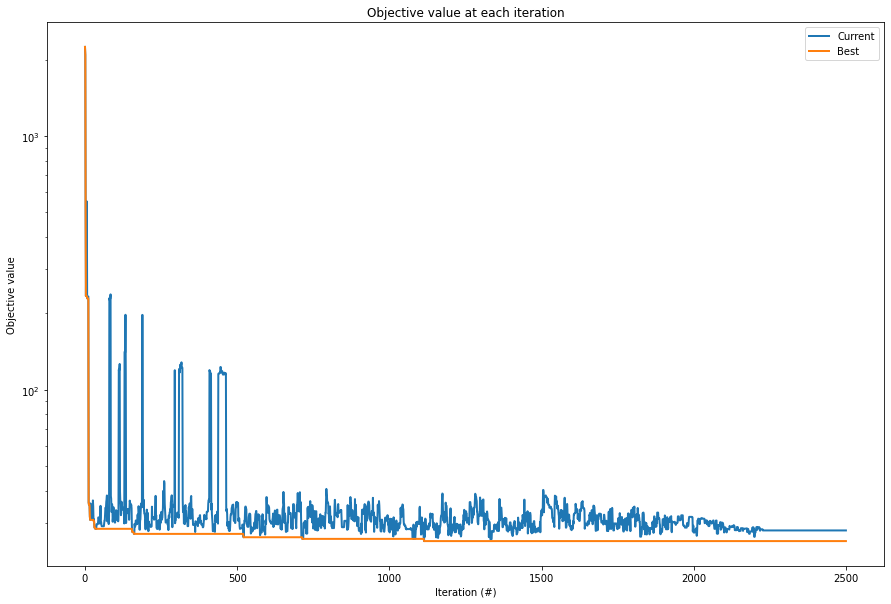

In [28]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

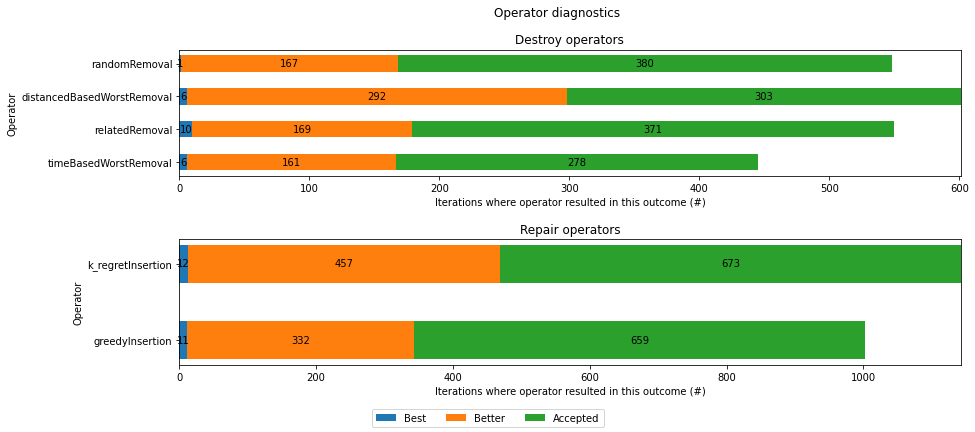

In [19]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])